<a href="https://colab.research.google.com/github/vaishnavir33/hpe/blob/main/Why_%26_Subject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip3 install gensim==3.8.3

In [19]:
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from gensim.models import Word2Vec 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings;
warnings.filterwarnings('ignore')

In [20]:
df = pd.read_excel('/content/drive/MyDrive/HPE/Sent/Results New.xlsx')
df.head()

,CommitID,Subject,Authname,Authmail,Commname,Commmail,Modf,Added,Dltd,Fname,What,Why
0,11ea255283509a9f016f378df4865235a25b1851,[SPARK-35111][SQL] Support Cast string to year...,Angerszhuuuu,angers.zhu@gmail.com,Max Gekk,max.gekk@gmail.com,TRUE,False,False,sql/catalyst/src/main/scala/org/apache/spark/s...,Support Cast string to year-month intervalSupp...,Support Cast string to year-month interval
1,11ea255283509a9f016f378df4865235a25b1851,[SPARK-35111][SQL] Support Cast string to year...,Angerszhuuuu,angers.zhu@gmail.com,Max Gekk,max.gekk@gmail.com,TRUE,False,False,sql/catalyst/src/main/scala/org/apache/spark/s...,Support Cast string to year-month intervalSupp...,Support Cast string to year-month interval
2,11ea255283509a9f016f378df4865235a25b1851,[SPARK-35111][SQL] Support Cast string to year...,Angerszhuuuu,angers.zhu@gmail.com,Max Gekk,max.gekk@gmail.com,TRUE,False,False,sql/catalyst/src/test/scala/org/apache/spark/s...,Support Cast string to year-month intervalSupp...,Support Cast string to year-month interval
3,2d2f467831d17df38fc6522da5066a8d848caaf5,[SPARK-35169][SQL] Fix wrong result of min ANS...,Angerszhuuuu,angers.zhu@gmail.com,Wenchen Fan,wenchen@databricks.com,TRUE,False,False,sql/catalyst/src/main/scala/org/apache/spark/s...,Before this patchWrong result of min ANSI inte...,Fix bug
4,2d2f467831d17df38fc6522da5066a8d848caaf5,[SPARK-35169][SQL] Fix wrong result of min ANS...,Angerszhuuuu,angers.zhu@gmail.com,Wenchen Fan,wenchen@databricks.com,TRUE,False,False,sql/core/src/test/resources/sql-tests/inputs/i...,Before this patchWrong result of min ANSI inte...,Fix bug


In [21]:
df.shape

(10737, 12)

In [22]:
df.isnull().sum()

CommitID    0
Subject     0
Authname    0
Authmail    0
Commname    0
Commmail    0
Modf        0
Added       0
Dltd        0
Fname       0
What        0
Why         0
dtype: int64

In [23]:
df.dropna(inplace=True)

In [24]:
df['Subject']= df['Subject'].astype(str)

In [25]:
why = df["Why"].unique().tolist()
len(why)

1424

In [26]:
random.shuffle(why)


why_train = [why[i] for i in range(round(0.9*len(why)))]

train_df = df[df['Why'].isin(why_train)]
validation_df = df[~df['Why'].isin(why_train)]

In [27]:
changes_train = []


for i in tqdm(why_train):
    temp = train_df[train_df["Why"] == i]["Subject"].tolist()
    changes_train.append(temp)

100%|██████████| 1282/1282 [00:01<00:00, 1025.50it/s]


In [28]:
changes_val = []

for i in tqdm(validation_df['Why'].unique()):
    temp = validation_df[validation_df["Why"] == i]["Subject"].tolist()
    changes_val.append(temp)

100%|██████████| 142/142 [00:00<00:00, 1848.34it/s]


In [29]:
 #train word2vec model
model = Word2Vec(window = 10, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

model.build_vocab(changes_train, progress_per=200)

model.train(changes_train, total_examples = model.corpus_count, 
            epochs=10, report_delay=1)

(42265, 89520)

In [30]:
model.init_sims(replace=True)

In [31]:
print(model)

Word2Vec(vocab=375, size=100, alpha=0.03)


In [32]:
# extract all vectors
X = model[model.wv.vocab]

X.shape

(375, 100)

In [33]:
!pip install umap-learn

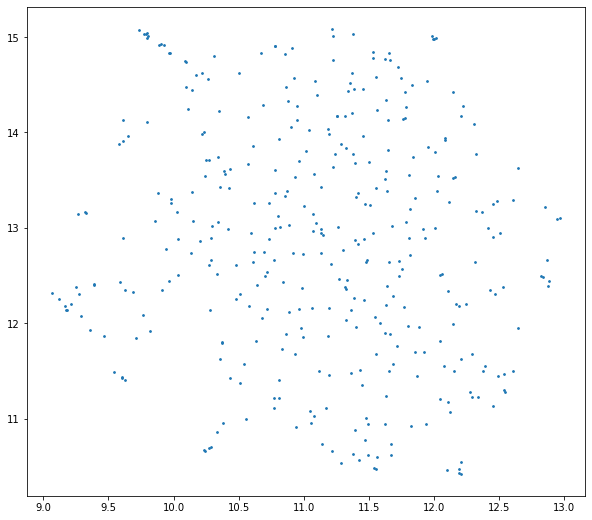

In [34]:
import umap

cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0,
                              n_components=2, random_state=42).fit_transform(X)

plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')